# Towed Body Model

*   From: Zhang et al, 2020 - Analysis of the Dynamic System of Wave Glider with a Towed Body

(1)   F_Float:
      Represents the force in the vertical direction of the float, including buoyancy and gravity.

         F(Float) = -mg + (p * A * (y+y1) * g),

  Where:

    m = the mass of the float body,

    g = the force of gravity,

    p (Rho) = the density of the seawater,

    A = the cross sectional area of the float, computed from frontal view as W x H, of float + glider,

    y = the draft of the float at some initial time,

    y1 = the change in draft of the float.



 This graph is plotted as a function of Force (N) per variation in draft (y1)

 Values:

    m = 155 kg,

      for WaveGlider SV3 including the float, umbilical and submerged glider. No payloads. From Google.

    g = 9.8 m/s^2,

    p = 1026 kg/m^3,

      From Google.

    A = 0.19 m^2,

      A(total) = A(float) + A(Glider) = 0.09 +0.1 = 0.19 m^2

    y = 0,

      Arbitrary



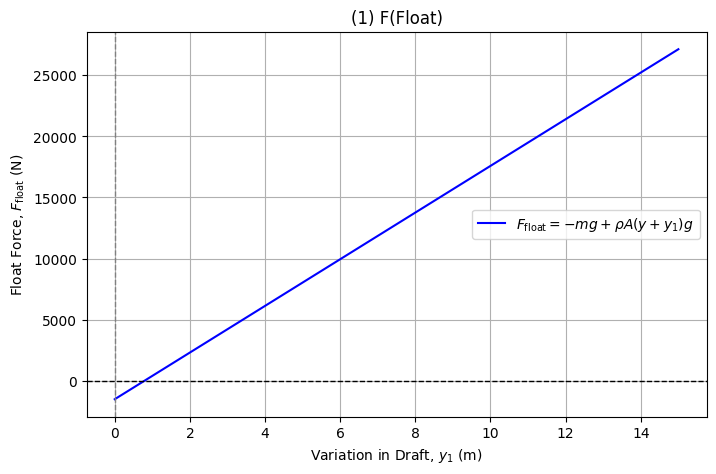

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Range for y1 (variation in draft)
y1_values = np.linspace(0, 15, 400)

# Constants
M = 155  # mass of the float (kg)
G = 9.8  # acceleration due to gravity (m/s^2)
RHO = 1026  # density of seawater (kg/m^3)
A = 0.19  # cross-sectional area of the float (m^2)
y = 0  # initial draft of the float (m)

# Compute F_float for different values of y1
F_float = -M * G + RHO * A * (y + y1_values) * G

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(y1_values, F_float, label=r'$F_{\text{float}} = -mg + \rho A(y + y_1)g$', color='b')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Equilibrium line
plt.axvline(0, color='gray', linestyle='--', linewidth=1)  # Reference line for y1 = 0

# Labels and title
plt.xlabel(r'Variation in Draft, $y_1$ (m)')
plt.ylabel(r'Float Force, $F_{\text{float}}$ (N)')
plt.title('(1) F(Float)')
plt.legend()
plt.grid(True)

# Plot
plt.show()

(2) F(Drag): Represents the hydrodynamic force of the float, given on the basis of the Morison equation.

     F(Drag) = 1/2 * Cd * p * S * ux * |ux|,

Where:

    Cd = the drag coefficient of the float, computed as:

    S = the projected area of the immersed portion perpendicular to the flow direction,

    p (Rho) = the density of the seawater,

    ux = the horizontal velocity of the float,

This graph is plotted as a function of force (N) per variation in horizontal velocity (m/s)

Values:

    Cd = 0.0030,

       an average, between the range of the Cd of a Kayak and a Keelboat.
    

         [Another option]: Cd = (2 * M * G)/(p A ux^2) [Youtube]
      

    S = Computed as
            A(rectangle) + A(triangle)
            = (w * h(rectangle)) + (1/2 * w * h(triangle))
            = (0.81 * 0.1) + (1/2 * 0.81 * 0.13)
            = 0.081 + 0.05265
            = 0.13365 m^2 = 0.134 m^2
          
        Values are estimates taken from WG spec sheet:

        WG float dimensions = (l * w * h) = 305 cm * 81 cm * 23 cm

          height was split between triangle
      

    p (Rho) = 1026 kg/m^3


(2.1) F(Drag_1): For computation of umbilical chord.

    F(Drag_1) = 1/2 * Cd * p * S * ux * |ux|,

Where:

    Cd = the drag coefficient of the umbilical chord

    S = the projected area of the immersed portion perpendicular to the flow direction,

    p (Rho) = the density of the seawater,

    ux = the horizontal velocity of the float,

(2.2) F(Drag_2): For computation of towed body.

    F(Drag_2) = 1/2 * Cd * p * S * ux * |ux|,

Where:

    Cd = the drag coefficient of the towed body

    S = the projected area of the immersed portion perpendicular to the flow direction,

    p (Rho) = the density of the seawater,

    ux = the horizontal velocity of the towed body,


  


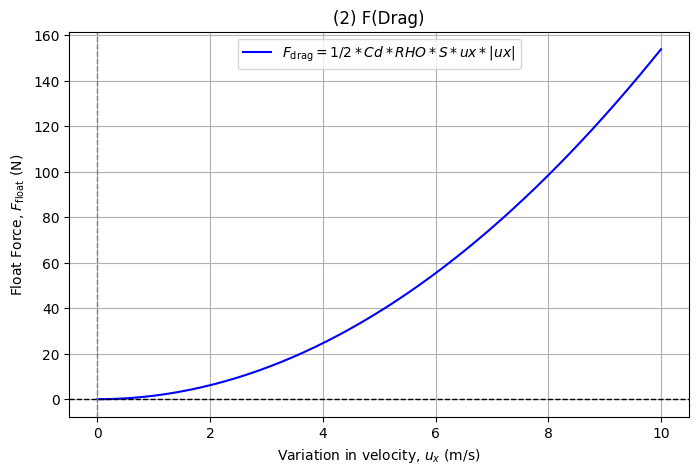

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Range for ux (variation in horizontal velocity)
ux_values = np.linspace(0, 10, 50)

# Constants
M = 155  # mass of the float (kg)
G = 9.8  # acceleration due to gravity (m/s^2)
RHO = 1026  # density of seawater (kg/m^3)
A = 0.19  # cross-sectional area of the float (m^2)
S = 1 # projected area of immersed portion (m^2) | SAMPLE
Cd = 0.0030
# Cd = (2 * M * G)/(1026 * 0.19 * pow(ux_values, 2)) # drag coefficient (dimensionless)


# Compute F_drag for different values of y1
F_drag = 1/2 * Cd * RHO * S * ux_values * abs(ux_values)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(ux_values, F_drag, label=r'$F_{\text{drag}} = 1/2 * Cd * RHO * S * ux * |ux|$', color='b')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Equilibrium line
plt.axvline(0, color='gray', linestyle='--', linewidth=1)  # Reference line for y1 = 0

# Labels and title
plt.xlabel(r'Variation in velocity, $u_x$ (m/s)')
plt.ylabel(r'Float Force, $F_{\text{float}}$ (N)')
plt.title('(2) F(Drag)')
plt.legend()
plt.grid(True)

# Plot
plt.show()

(3) F(Umbilical): represents the force of the umbilical.

    F(umbilical) = -m1 * g + Fb1 + Fd1,

Where:

        g = 9.81 m/s², Gravity

        rho = 1026 kg/m³, Density of seawater

     Umbilical Parameters:

        m1 = 50 kg, Mass of umbilical

        length = 10 m, Length of umbilical submerged

        diameter = 0.05 m, Diameter of umbilical

        CD = 1.1, drag coefficient for a cylinder

         A = diameter * length m², Projected area perpendicular to flow

    Environmental Conditions:

     u = 0-3 m/s, Horizontal water speed range
     (from environmental modelling or sensor input)

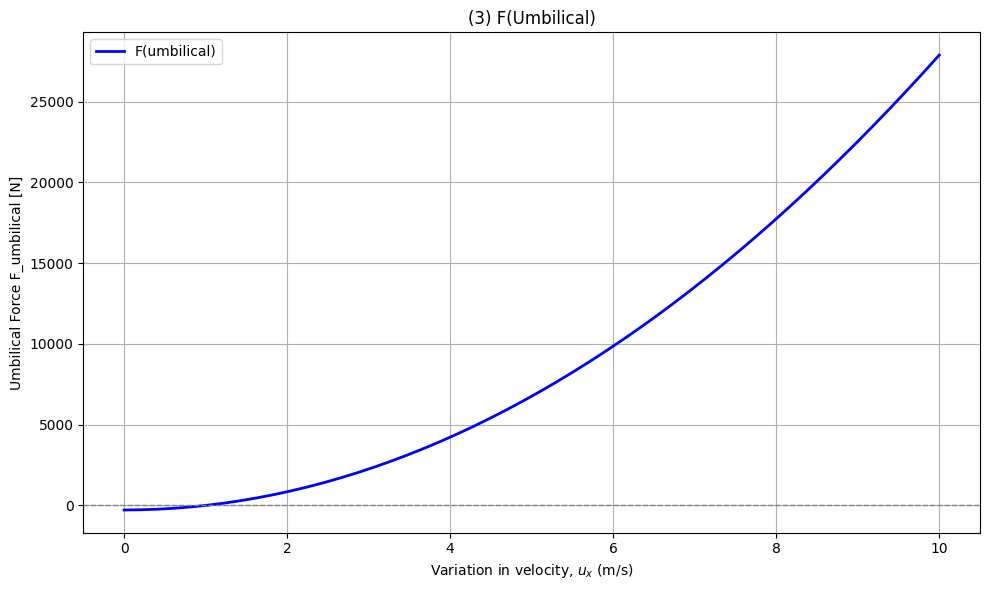

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Range for ux (variation in horizontal velocity)
ux_values = np.linspace(0, 10, 50)

# Constants
G = 9.81                  # gravitational acceleration in m/s²
RHO = 1025                # density of seawater in kg/m³ (typical value)
M1 = 50                   # mass of umbilical in kg (measured or estimated)
length = 10               # length of umbilical in meters (variable)
diameter = 0.05           # diameter in meters
radius = diameter / 2     # radius in meters

# Drag force parameters
CD = 1.1                  # drag coefficient for cylindrical shape
A = diameter * length     # projected area perpendicular to flow in m²

# Calculate buoyancy force Fb(1) using Archimedes’ principle
volume = np.pi * radius**2 * length  # submerged volume in m³
Fb1 = RHO * volume * G               # buoyant force in N

# Hydrodynamic drag force on the umbilical using Morison equation
Fd1 = 0.5 * CD * RHO * A * ux_values * abs(ux_values)

# Total umbilical force
F_umbilical = -M1 * G + Fb1 + Fd1

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(ux_values, F_umbilical, label='F(umbilical)', color='blue', linewidth=2)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Variation in velocity, $u_x$ (m/s)')
plt.ylabel('Umbilical Force F_umbilical [N]')
plt.title('(3) F(Umbilical)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

F(D1): Hydrodynamic Force of the Umbilical

Buoyant Force (Fb1): 197.43 N


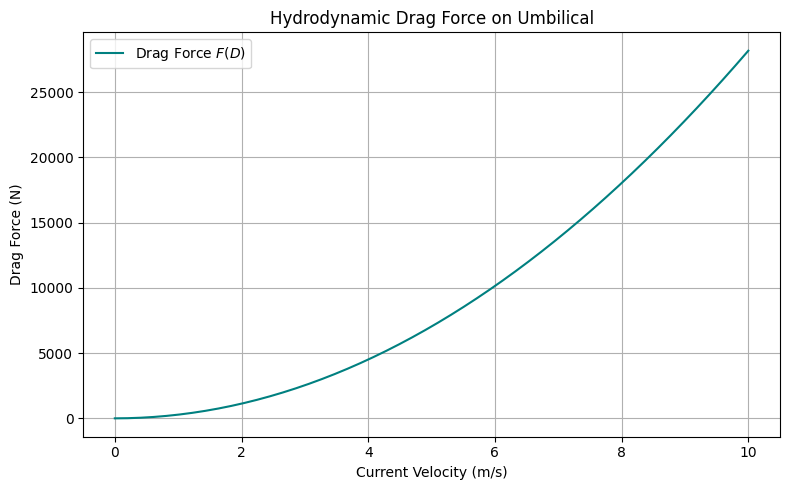

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Physical constants
g = 9.81                  # gravitational acceleration in m/s²
rho = 1025                # density of seawater in kg/m³

# Umbilical properties
m1 = 50                   # mass of umbilical in kg
length = 10               # length of umbilical in meters
diameter = 0.05           # diameter in meters
radius = diameter / 2     # radius in meters

# Drag force parameters
CD = 1.1                  # drag coefficient for cylindrical shape
A = diameter * length     # projected area perpendicular to flow in m²

# Calculate buoyancy force Fb1 using Archimedes’ principle
volume = np.pi * radius**2 * length  # submerged volume in m³
Fb1 = rho * volume * g               # buoyant force in N

print(f"Buoyant Force (Fb1): {Fb1:.2f} N")

# Calculate hydrodynamic drag force over a range of velocities
u = np.linspace(0, 10, 50)                     # velocity range from 0 to 10 m/s
Fd1 = 0.5 * CD * rho * A * u**2                # Morison equation

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(u, Fd1, label='Drag Force $F(D)$', color='teal')
plt.title('Hydrodynamic Drag Force on Umbilical')
plt.xlabel('Current Velocity (m/s)')
plt.ylabel('Drag Force (N)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


F(Fin): The Hydrodynamic force of each fin on the raft

    F(Fin) = 1/2 * Cd3 * rho * S3 * u3 * cos(alpha) * |u3 * cos(alpha)|
    + 1/2 * Cl3 * rho * S3 * sin(alpha) * |u3 * sin(alpha)|,

Where:

    rho = 1026 kg/m³, Density of seawater,

    Cd3 = the drag coefficient of the fin,

    Cl3 = the lift coefficient of the fin,

    S3 = the projected area of the fin perpendicular to the flow direction, assuming a rectangular shape (S = b * c),

    u3 = the horizontal velocity of the fin,

    alpha = the "attack angle" of the fin

As per Wang et al, 2018:

    Cl = (1.8 * pi * lambda) /
    cos(chi) * (sqrt( ((lambda^2)/(cos^4(chi)) + 4) + 1.8
    * alpha(k) + (Cdc / lambda) * alpha(k)^2

    Cd = CdO + (Cl)^2/0.9 * pi * lambda

square root denom:  2.8312476244073297
front:  2.488097131609628
back:  97.2
c_lift:  4353.174741464205
back_2:  132229798.30072647
c_drag:  132229798.30872647


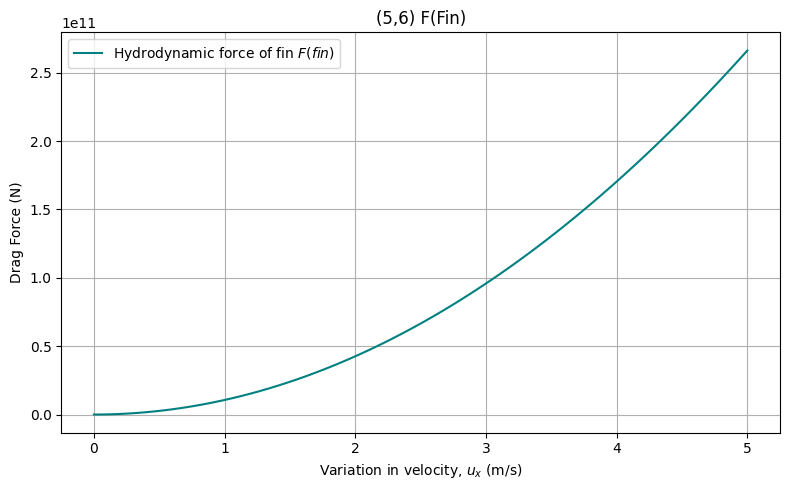

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Constants
RHO = 1026
S = 0.06      #m^2, from zhang et al

# other variables
chi = 0.25
lamb = 2
alpha = 18
c_dc = 0.6
pi = 3.14
c_do = 0.008
cos_4_chi = math.cos(chi) ** 4

u3 = np.linspace(0, 5, 100)      # velocity range from 0 to 5 m/s

# Computing c_lift3 in steps
sqrt_denom = math.cos(chi) * math.sqrt( ((math.pow(lamb, 2))/cos_4_chi) + 4)

c_lift_1 = ((1.8 * pi * lamb) / ((math.cos(chi) * sqrt_denom) + 1.8))

c_lift_2 = (c_dc / lamb) * math.pow(alpha, 2)

print("square root denom: ", sqrt_denom)
print("front: ", c_lift_1)
print("back: ", c_lift_2)

c_lift = c_lift_1 * alpha * c_lift_2

print("c_lift: ", c_lift)

# Computing c_drag3
c_drag_back = math.pow(c_lift, 2) / 0.9 * pi * lamb
c_drag = c_do + c_drag_back

print("back_2: ", c_drag_back)
print("c_drag: ", c_drag)

# f_fin in parts
sin_alpha = math.sin(alpha)
cos_alpha = math.cos(alpha)

f_fin = (6) * (0.5 * c_drag * RHO * S * u3 * cos_alpha * abs(u3 * cos_alpha)) + 0.5 * c_lift * RHO * S * u3 * sin_alpha * abs(u3 * sin_alpha)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(u3, f_fin, label='Hydrodynamic force of fin $F(fin)$', color='teal')
plt.title('(5,6) F(Fin)')
plt.xlabel('Variation in velocity, $u_x$ (m/s)')
plt.ylabel('Drag Force (N)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()





(4) F(body): the force of the towed body

    F(body) = (-m2 * g) + Fb2 + Fd2,

Where:

    m2 = mass of the towed body,

    Fb2 = the buyoancy of the towed body,

    Fd2 = the hydrodynamic force of the towed body

Computed as:

    Fd2 = 1/2 * Cd * p * S * ux * |ux|,
    Fb2 = p * volume * g


Buoyant Force (Fb_1): 303.72 N


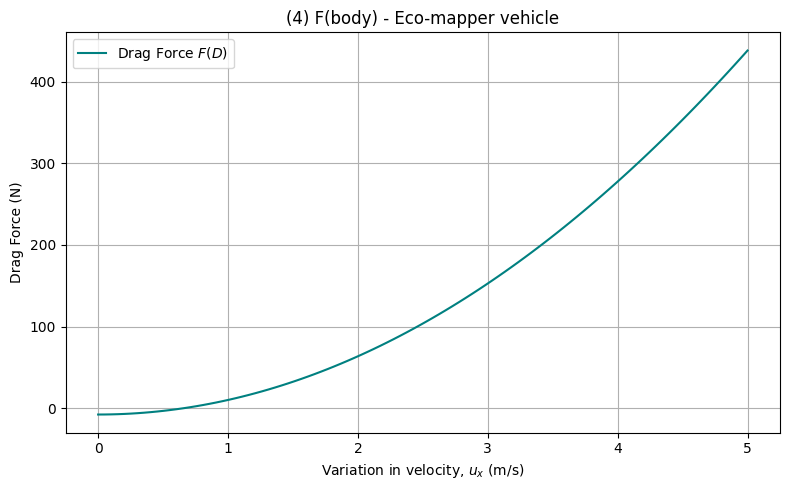

Buoyant Force (Fb_2): 7.31 N


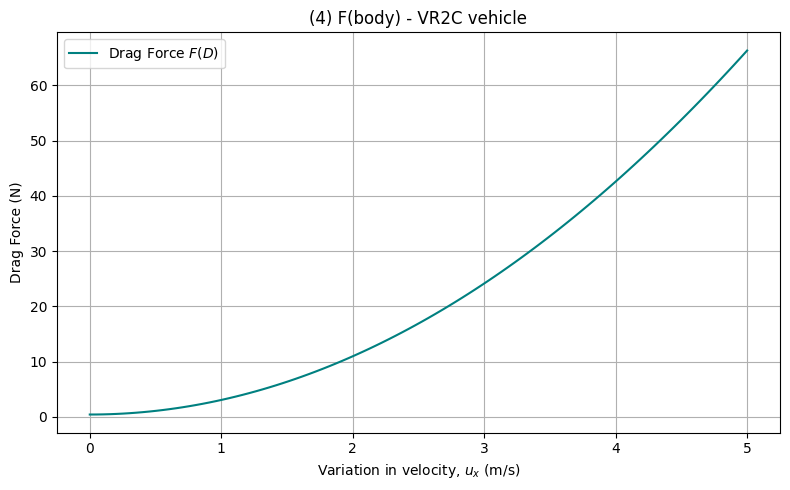

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Constants
RHO = 1026                # gravitational acceleration in m/s²
G = 9.81                  # density of seawater in kg/m³

# other variables:

ux_values = np.linspace(0, 5, 100) # velocity range from 0 to 5 m/s

# YSI Eco_mapper -----------------------------------------------------
m_1 = 31.75         # mass of towed body in kg -- 70 lbs
diameter_1 = 0.147   # diameter in meters -- 14.7cm
radius_1 = diameter_1 / 2
length_1 = 1.778         # length in meters -- (70 in, average range 60-85 in)
cd_1 = 0.133             # drag coefficient for torpedo shape (spec sheet)
S_1 = diameter_1 * length_1

# Calculate buoyancy force using Archimedes’ principle
volume_1 = np.pi * radius_1**2 * length_1  # submerged volume in m³
Fb_1 = RHO * volume_1 * G               # buoyant force in N
print(f"Buoyant Force (Fb_1): {Fb_1:.2f} N")

# Calculate hydrodynamic drag force over a range of velocities
Fd_1 = 0.5 * cd_1 * RHO * S_1 * ux_values**2    # Morison equation

# Calculate total towed body force
F_towed_1 = (-m_1 * G) + Fb_1 + Fd_1

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(ux_values, F_towed_1, label='Drag Force $F(D)$', color='teal')
plt.title('(4) F(body) - Eco-mapper vehicle')
plt.xlabel('Variation in velocity, $u_x$ (m/s)')
plt.ylabel('Drag Force (N)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Liquid Robotics Mini VR2C -----------------------------------------------------
m_2 = 0.7                # mass of towed body in kg
diameter_2 = 0.054
radius_2 =  diameter_2 / 2
length_2 = 0.317
cd_2 = 0.3                  # drag coefficient for torpedo shape (Change)
S_2 = diameter_2 * length_2

# Calculate buoyancy force using Archimedes’ principle
volume_2 = np.pi * radius_2**2 * length_2  # submerged volume in m³
Fb_2 = RHO * volume_2 * G               # buoyant force in N
print(f"Buoyant Force (Fb_2): {Fb_2:.2f} N")

# Calculate hydrodynamic drag force over a range of velocities
Fd_2 = 0.5 * cd_2 * RHO * S_2 * ux_values**2                # Morison equation

# Calculate total towed body force
F_towed_2 = (-m_2 * G) + Fb_2 + Fd_2

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(ux_values, F_towed_2, label='Drag Force $F(D)$', color='teal')
plt.title('(4) F(body) - VR2C vehicle')
plt.xlabel('Variation in velocity, $u_x$ (m/s)')
plt.ylabel('Drag Force (N)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



(8, 9) Daisy-chained Damp System for Towed-Body cable

(8) F(d4): hydrodynamic force for segment of Towed-body cable

    F(d4) = 1/2 * Cd * p * S * ux * |ux|,

Where:

    Cd = drag coefficient for cable segment
    p = density of seawater
    S = projected area for cable segment
    ux = velocity

(9) F(c): force in the vertical direction for each segment of Towed-body cable

    F(c) = -m4 * g + Fb4,

Where:
   
    m4 = mass of cable segment,
    F(b4) = buoyancy of cable segment, computed as:
        F(b4) = p * volume * g


Assuming a cable length of 6 m discretised as 60 segments of length of 100 mm (0.1 m) each as as per Zhang et al.

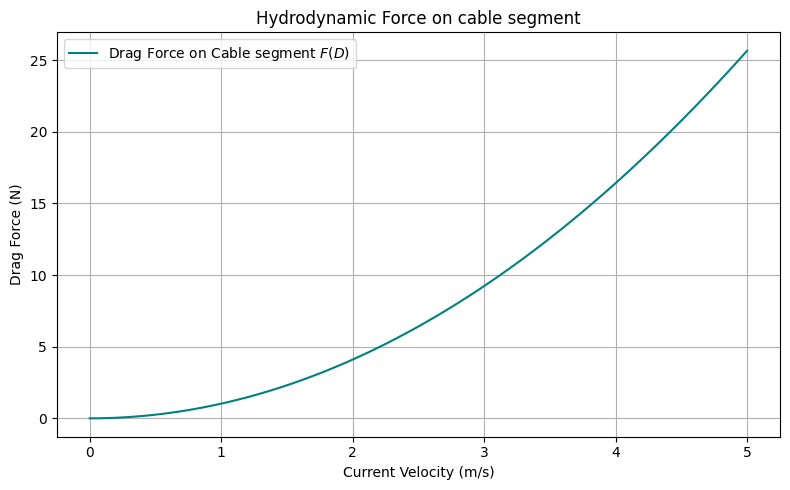

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Constants
RHO = 1026                # gravitational acceleration in m/s²
G = 9.81                  # density of seawater in kg/m³

# other variables:

ux_values = np.linspace(0, 5, 100) # velocity range from 0 to 5 m/s
m = 0.05                # !mass of cable segment in kg, assuming cable mass = 3kg
radius = 0.01           # radius in m
diameter =  2 * radius  # diameter in m
length =  0.1           # length in meters
cd =  1                 # !drag coefficient for cable segment (assuming cylinder)
S = diameter * length

# Calculate buoyancy force using Archimedes’ principle
volume = np.pi * radius **2 * length  # submerged volume in m³
Fb = RHO * volume * G               # buoyant force in N

# Calculate vertical force Fc
Fc = (-m * G) + Fb

# Calculate hydrodynamic drag force over a range of velocities Fd
Fd = 0.5 * cd * RHO * S * ux_values**2    # Morison equation

# Plotting -- Fd
plt.figure(figsize=(8, 5))
plt.plot(ux_values, Fd, label='Drag Force on Cable segment $F(D)$', color='teal')
plt.title('Hydrodynamic Force on cable segment')
plt.xlabel('Current Velocity (m/s)')
plt.ylabel('Drag Force (N)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
